In [34]:
from DIW import *
from skimage.data import astronaut
from skimage.data import camera
from skimage.data import coffee
from skimage.data import coins
from skimage.filters import gaussian
from PIL import Image
from copy import deepcopy
import math
import skimage
import haarPsi as hp

In [35]:
def addGaussianNoise(original_image, psnrdb=60):

    k = 1.0/math.pow(10,psnrdb/20.0)

    gaussian_noise = np.random.normal(scale=k*np.max(original_image), size=original_image.shape)

    added_gaussian_image = original_image+gaussian_noise

    signal = np.sum(np.square(original_image,dtype=float))

    noise = np.sum(np.square(original_image-added_gaussian_image,dtype=float))

    return added_gaussian_image

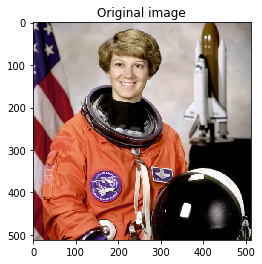

In [36]:
plt.figure()
plt.title("Original image")

############################################
image = astronaut() # 500 x 500

#image = camera()

#image = coffee()

#image = coins()

plt.imshow(image, cmap="gray") # 300 x 350

In [37]:
examples = [
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':1,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':2,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':3,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':4,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':5,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':6,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':7,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':8,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':9,
        'attack':addGaussianNoise
    },
    {
        'image': image,
        'left' : 30,
        'right': 40,
        'block_size': 100,
        'num_bits':10,
        'attack':addGaussianNoise
    }
]

In [38]:
BER_list = []
HaarPsi_list = []
PSNR_list = []
SNR_list = []
# experiment(original_image, left, right, block_size, num_bits, attack)
for example in examples:
    BER,HaarPsi = experiment(example['image'],
                      example['left'],
                      example['right'],
                      example['block_size'],
                      example['num_bits'],
                      example['attack']
                    )
    BER_list.append(BER)
    HaarPsi_list.append(HaarPsi)
    print("Number of hidden bits: ",example['num_bits'])
    print("BER:",BER)
    print("HaarPsi:",HaarPsi)
    print()

WATERMARKED_BITS	EXTRACTED_BITS
0			0
Number of hidden bits:  1
BER: 0.0
HaarPsi: 0.9955444269984872

WATERMARKED_BITS	EXTRACTED_BITS
1			1
0			0
Number of hidden bits:  2
BER: 0.0
HaarPsi: 0.9927481249464652

WATERMARKED_BITS	EXTRACTED_BITS
0			0
1			1
0			0
Number of hidden bits:  3
BER: 0.0
HaarPsi: 0.9885681760791275

WATERMARKED_BITS	EXTRACTED_BITS
1			1
1			1
0			0
1			1
Number of hidden bits:  4
BER: 0.0
HaarPsi: 0.988725655932458

WATERMARKED_BITS	EXTRACTED_BITS
1			1
1			1
1			1
0			0
0			0
Number of hidden bits:  5
BER: 0.0
HaarPsi: 0.9884269601653058

WATERMARKED_BITS	EXTRACTED_BITS
0			0
0			0
1			1
1			1
1			1
0			0
Number of hidden bits:  6
BER: 0.0
HaarPsi: 0.9834832417407857

WATERMARKED_BITS	EXTRACTED_BITS
0			0
0			0
1			1
1			1
0			0
0			0
0			0
Number of hidden bits:  7
BER: 0.0
HaarPsi: 0.9834013472472313

WATERMARKED_BITS	EXTRACTED_BITS
0			0
0			0
0			0
1			1
1			1
1			1
0			0
0			0
Number of hidden bits:  8
BER: 0.0
HaarPsi: 0.983328587508587

WATERMARKED_BITS	E

Text(0.5,0,'Number of bits')

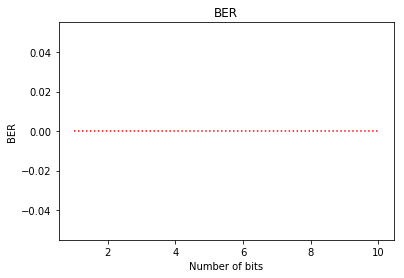

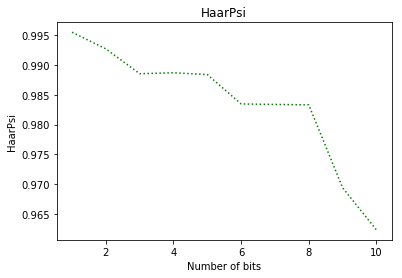

In [39]:
num_bits = [ exp['num_bits'] for exp in examples]

plt.figure()
plt.title("BER")
plt.plot(num_bits,BER_list,"r:")
plt.ylabel("BER")
plt.xlabel("Number of bits")

plt.figure()
plt.title("HaarPsi")
plt.plot(num_bits,HaarPsi_list,"g:")
plt.ylabel("HaarPsi")
plt.xlabel("Number of bits")